In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd 


# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

In [2]:
# Load international online transactions data from CSV
df = pd.read_csv('C:/Users/alexa/Downloads/Machine-Learning-Masterclass-master/Machine-Learning-Masterclass-master/Project 4 Workbook Bundle/project_files/int_online_tx.csv')

In [3]:
# Dataframe dimensions
df.shape

(35116, 8)

In [4]:
# First 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


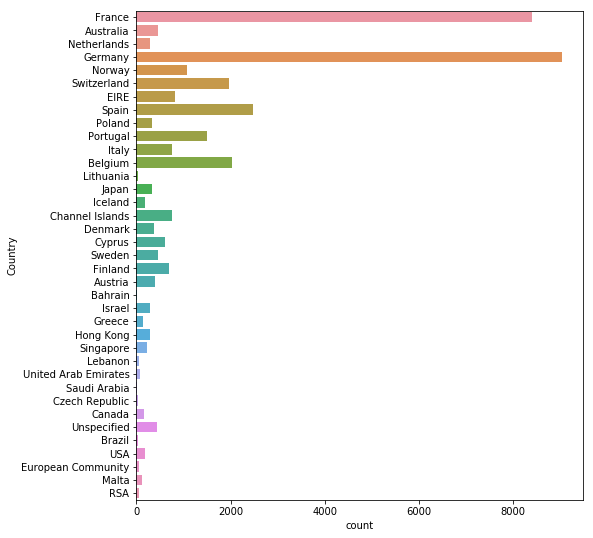

In [5]:
# Make figsize 6x7
plt.figure(figsize=(8,9))

# Bar plot by country
sns.countplot(y='Country', data=df)

In [6]:
# Missing data by feature
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [7]:
# Only keep transactions with CustomerID's
df = df[df['CustomerID'].notnull()]

In [8]:
# Convert customer ID's into integers
df['CustomerID'] = df.CustomerID.astype(int)

# Display first 5 CustomerID's in the transaction dataset
df.CustomerID.head()

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int32

In [9]:
# Create 'Sales' interaction feature
df['Sales'] = df.Quantity * df.UnitPrice

# Display first 5 Sales values in the transaction dataset
df['Sales'].head()

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

In [10]:
# Save cleaned transaction-level data
df.to_csv('cleaned_transactions.csv', index=None)

In [11]:
# Aggegrate invoice data
invoice_data = df.groupby('CustomerID').InvoiceNo.agg({ 'total_transactions' : 'nunique' })

# Display invoice data for first 5 customers
invoice_data.head()

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [12]:
# Aggregate product data
product_data = df.groupby('CustomerID').StockCode.agg({  'total_products': 'count',  'total_unique_products': 'nunique'  })

# Display product data for first 5 customers
product_data.head()

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [13]:
# Roll up sales data
sales_data = df.groupby('CustomerID').Sales.agg({  'total_sales': 'sum',  'avg_product_value':'mean'  })

# Display sales data for first 5 customers
sales_data.head()

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


In [14]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data = df.groupby(['CustomerID', 'InvoiceNo']).Sales.agg({ 'cart_value': 'sum' })

# Reset index
cart_data.reset_index(inplace=True)

# Display cart data for first 5 CARTS
cart_data.head()

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


In [15]:
# Aggregate cart data (at customer-level)
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({ 'avg_cart_value': 'mean', 'min_cart_value': 'min', 
                                                               'max_cart_value': 'max'})


# Display cart data for first 5 CUSTOMERS
agg_cart_data.head()

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


In [16]:
# Join together customer-level ABT
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

# Display customer-level data for first 5 customers
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [17]:
# Save analytical base table
customer_df.to_csv('analytical_base_table.csv')

In [18]:
# Read cleaned_transactions.csv
df = pd.read_csv('cleaned_transactions.csv')

In [19]:
# First 10 StockCodes and Descriptions
df[['StockCode', 'Description']].head(10)

,StockCode,Description
0,22728,ALARM CLOCK BAKELIKE PINK
1,22727,ALARM CLOCK BAKELIKE RED
2,22726,ALARM CLOCK BAKELIKE GREEN
3,21724,PANDA AND BUNNIES STICKER SHEET
4,21883,STARS GIFT TAPE
5,10002,INFLATABLE POLITICAL GLOBE
6,21791,VINTAGE HEADS AND TAILS CARD GAME
7,21035,SET/2 RED RETROSPOT TEA TOWELS
8,22326,ROUND SNACK BOXES SET OF4 WOODLAND
9,22629,SPACEBOY LUNCH BOX


In [20]:
# Number of unique items
len(df.StockCode.unique())

2574

In [21]:
# Create toy_df
toy_df = df[df['CustomerID'].isin([14566,17644])]

# Display toy_df
toy_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
19250,563900,85099C,JUMBO BAG BAROQUE BLACK WHITE,200,8/21/11 11:05,1.79,14566,Channel Islands,358.0
19251,563900,85099B,JUMBO BAG RED RETROSPOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.0
19252,563900,23199,JUMBO BAG APPLES,200,8/21/11 11:05,1.79,14566,Channel Islands,358.0
19253,563900,22386,JUMBO BAG PINK POLKADOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.0


In [22]:
# Get toy_item_dummies# Get to 
toy_item_dummies = pd.get_dummies(toy_df.StockCode)
# Add CustomerID to toy_item_dummies
toy_item_dummies['CustomerID'] = toy_df.CustomerID

# Display toy_item_dummies
toy_item_dummies

,22386,23199,85099B,85099C,CustomerID
19250,0,0,0,1,14566
19251,0,0,1,0,14566
19252,0,1,0,0,14566
19253,1,0,0,0,14566


In [23]:
# Create toy_item_data by aggregating at customer level
toy_item_data = toy_item_dummies.groupby('CustomerID').sum()

# Display toy_item_data
toy_item_data

,22386,23199,85099B,85099C
CustomerID,,,,
14566,1,1,1,1


In [24]:
# Get item_dummies
item_dummies = pd.get_dummies(df.StockCode)

# Add CustomerID to item_dummies
item_dummies['CustomerID'] = df.CustomerID

# Display first 5 rows of item_dummies
item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583


In [25]:
# Create item_data by aggregating at customer level
item_data = item_dummies.groupby('CustomerID').sum()

# Display first 5 rows of item_data
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5


In [26]:
# Total times each item was purchased
item_data.sum()

10002        12
10120         1
10125        13
10133         5
10135         4
11001         8
15034         5
15036        19
15039         3
15044A        6
15044B        3
15044C        2
15044D        4
15056BL      50
15056N       35
15056P       24
15058A        9
15058B        8
15058C        4
15060B       12
16008        11
16011         3
16012         4
16014        10
16016        16
16045         8
16048         8
16054         2
16156L        6
16156S       12
           ... 
90098         1
90099         2
90108         1
90114         1
90120B        1
90145         2
90160A        1
90160B        1
90160C        1
90160D        1
90161B        1
90161C        1
90161D        1
90162A        1
90162B        1
90164A        1
90170         1
90173         1
90184B        1
90184C        1
90192         1
90201A        1
90201B        3
90201C        2
90201D        1
90202D        1
90204         1
C2            6
M            34
POST       1055
Length: 2574, dtype: int

In [27]:
# Save item_data.csv
item_data.to_csv('item_data.csv')

In [28]:
# Display most popular 20 items
item_data.sum().sort_values().tail(20)

22961      114
22630      115
22139      117
21080      122
85099B     123
20726      123
20719      128
20750      132
23084      140
20725      141
21212      143
22551      158
22629      160
22328      166
21731      169
22556      179
22554      197
22423      222
22326      271
POST      1055
dtype: int64

In [29]:
# Get list of StockCodes for the 20 most popular items
top_20_items = item_data.sum().sort_values().tail(20).index

top_20_items

Index(['22961', '22630', '22139', '21080', '85099B', '20726', '20719', '20750',
       '23084', '20725', '21212', '22551', '22629', '22328', '21731', '22556',
       '22554', '22423', '22326', 'POST'],
      dtype='object')

In [30]:
# Keep only features for top 20 items
top_20_item_data = item_data[top_20_items]

# Shape of remaining dataframe
top_20_item_data.shape

(414, 20)

In [31]:
# Display first 5 rows of top_20_item_data
top_20_item_data.head(5)

,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [32]:
# Save threshold_item_data.csv
top_20_item_data.to_csv('threshold_item_data.csv')

In [33]:
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA

In [34]:
# Read item_data.csv
item_data = pd.read_csv('item_data.csv', index_col=0)

In [35]:
# Display item_data's shape
item_data.shape

(414, 2574)

In [36]:
# Set random seed
np.random.seed(101)

# Create first feature: x1
x1 = np.random.normal(0, 1, 100)

# Create second feature: x2
x2 = x1 + np.random.normal(0, 1, 100)

In [37]:
# Stack together as columns
X = np.stack([x1, x2], axis=1)

# Print shape of X
X.shape

(100, 2)

In [38]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

# Display first 5 rows of X_scaled
X_scaled[:5]

array([[ 2.45737416,  2.76968241],
       [ 0.44665735, -0.38363275],
       [ 0.71733989, -0.37695455],
       [ 0.3264168 , -0.60579169],
       [ 0.46889068,  0.39146426]])

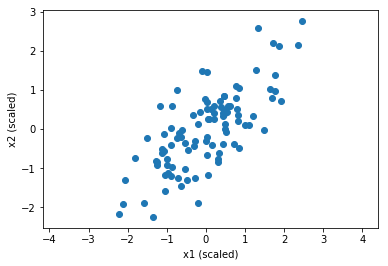

In [39]:
# Plot scatterplot of scaled x1 against scaled x2
plt.scatter(X_scaled[:,0], X_scaled[:,1])
# Put plot axes on the same scale
plt.axis('equal')


# Label axes
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')
# Clear text residue
plt.show()

In [40]:
# Initialize instance of PCA transformation
pca = PCA()

# Fit the instance
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
# Display principal components
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

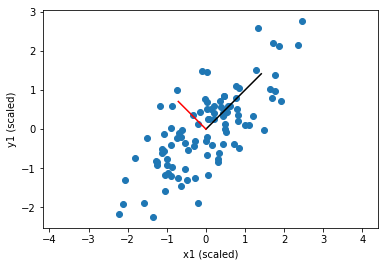

In [42]:
# Plot scaled dataset and make it partially transparent
plt.scatter(X_scaled[:,0], X_scaled[:,1], alpha=1)

# Plot first principal component in black
plt.plot([0, 2*pca.components_[0,0]], [0, 2*pca.components_[0,1]], 'k')

# Plot second principal component in red
plt.plot([0, pca.components_[1,0]], [0, pca.components_[1,1]], 'r')

# Set axes
plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.ylabel('y1 (scaled)')


# Clear text residue
plt.show()

In [43]:
# Generate new features
PC = pca.transform(X_scaled)

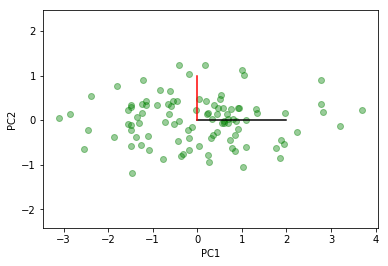

In [44]:
# Plot transformed dataset
plt.scatter(PC[:,0], PC[:,1], alpha=0.4, color='g')

# Plot first principal component in black
plt.plot([0, 2], [0,0], 'k')

# Plot second principal component in red
plt.plot([0,0], [0,1], 'r')

# Set axes
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Clear text residue
plt.show()

In [45]:
# Display explained variance ratio
pca.explained_variance_ratio_

array([0.86915841, 0.13084159])

In [46]:
# Initialize and fit a PCA transformation, only keeping 1 component
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
# Display principal components
pca.components_

array([[0.70710678, 0.70710678]])

In [48]:
# Generate new features
PC = pca.transform(X_scaled)
print(PC.shape)

(100, 1)


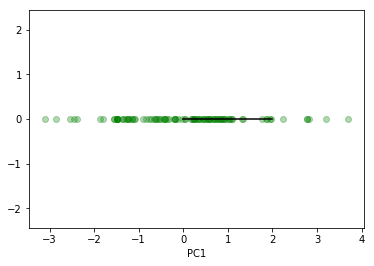

In [49]:
# Plot transformed dataset
plt.scatter(PC[:,0], len(PC)*[0], alpha=0.3, color='g')


# Plot first principal component in black
plt.plot([0,2],[0,0], 'k')

# Set axes
plt.axis('equal')
plt.xlabel('PC1')

# Clear text residue
plt.show()

In [50]:
# Initialize instance of StandardScaler
sc = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)
# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [51]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[ 5.87614052e+00,  4.82891689e+00, -4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  1.32879818e-15],
       [-4.21983747e+00,  1.22621722e+00, -1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04, -4.78436735e-15],
       [-1.26084676e+00,  2.38766371e+00, -7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04,  5.28396771e-15],
       [-4.92931983e+00, -7.14858724e-01, -1.58093026e+00, ...,
        -1.98603886e-03,  9.92316312e-05,  4.38191150e-15],
       [-2.05311348e+00,  2.11095022e+00,  1.84807021e-01, ...,
        -3.43415269e-04, -1.32981672e-04, -6.84452495e-14]])

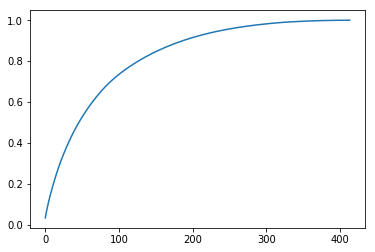

In [53]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [54]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[124]

0.7955069032205406

In [55]:
# Initialize PCA transformation, only keeping 125 components
pca = PCA(n_components=125)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 125)

In [56]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,...,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,...,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,...,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,...,-1.869817,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232
12352,-2.053129,2.110788,0.184844,0.128379,0.087133,-1.943497,2.383475,0.898283,-0.672848,0.081181,...,1.695937,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235


In [57]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')

In [68]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Scikit-Learn's KMeans algorithm (added later)
from sklearn.cluster import KMeans

In [69]:
# Import analytical base table
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

In [70]:
# Print shape of each dataframe
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)

(414, 8)
(414, 20)
(414, 125)


In [71]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,0,1,0,0,2,0,5


In [72]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first 5 rows of pca_df
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828892,...,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219839,1.226195,...,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387828,...,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714874,...,-1.869817,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053129,2.110788,...,1.695937,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235


In [73]:
# First 5 observations of base_df
base_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [74]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [75]:
# Fit K-Means pipeline
k_means.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [76]:
# Save clusters to base_df
base_df['cluster'] = k_means.predict(base_df)

# Display first 5 rows of base_df
base_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,1
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


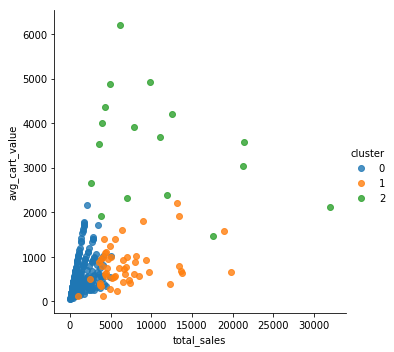

In [77]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=base_df, fit_reg=False)

In [82]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=4, random_state=123))

In [83]:
# Fit K-Means pipeline
k_means.fit(threshold_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [84]:
# Save clusters to threshold_df
threshold_df['cluster'] = k_means.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,5,0,0,4,0,0,2
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,4,1
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,1,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,1,0,0,0,0,0,0,0,1,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,1,0,0,2,0,5,1


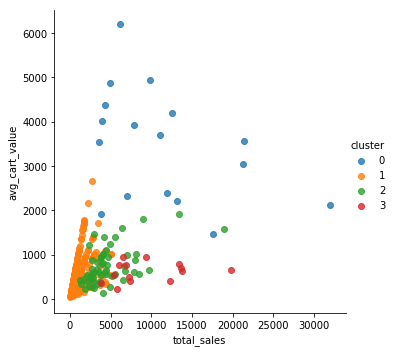

In [85]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

In [131]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=5, random_state=123))

In [132]:
# Fit K-Means pipeline
k_means.fit(pca_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [133]:
# Save clusters to pca_df
pca_df['cluster'] = k_means.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828892,...,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058,2
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219839,1.226195,...,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387828,...,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714874,...,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232,2
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053129,2.110788,...,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235,2


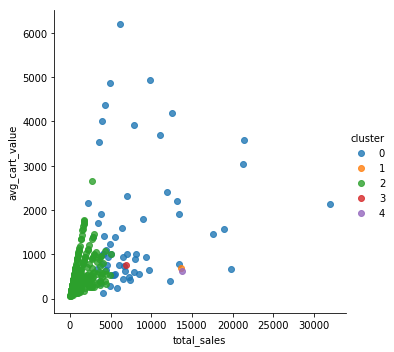

In [134]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

In [135]:
# Check all indices are identical
print(all(base_df.index == threshold_df.index))
print(all(base_df.index == pca_df.index))

True
True


In [136]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

In [137]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.6786643783542469

In [138]:
# Similary between threshold_df.cluster and base_df.cluster
adjusted_rand_score(threshold_df.cluster, base_df.cluster)

0.6786643783542469

In [141]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
adjusted_mutual_info_score(base_df.cluster, pca_df.cluster)

NameError: name 'adjusted_mutual_info_score' is not defined